<a href="https://colab.research.google.com/github/AkshadK7/Exploratory-Data-Analysis/blob/master/My_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

**Exploratory Data Analysis** or **(EDA)** is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights.

###About 

**Name:** Akshad Kolhatkar

**College:** SRM University

**Branch:** CSE BTech 

**Website:** akshad.netlify.app

**Contact:** 9765248740

###Problem Statement

 In this project, you as a data scientist are expected to perform Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.

### Objective

The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

# STEP 1:

##Importing the Libraries

Let's first import some Libraries to get started...

In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##Reading and Displaying Data

We should now include our Dataset in order to process it further and display some stats to perform an EDA Report on it.

In [517]:
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


###**Statistical Summary**

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [519]:
print("Shape of the Data =",data.shape)
print("Dimensions =", data.ndim)

Shape of the Data = (11914, 16)
Dimensions = 2


In [520]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


###**Finding The Null Values**

In [521]:
data.isnull()                          #All the Null Values are represented as True

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [522]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# STEP 2:

##Eliminating The Irrelevant Column Labels

While processing A Dataset, it is very important to clean the data efficiently to reduce errors and provide an accurate Thesis Report.

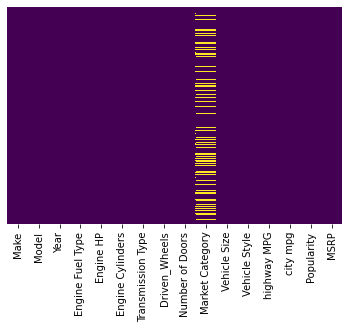

In [523]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can clearly see from the Heat Map that the Market Category, Number of Doors and Engine Fuel Type columns contain the maximum number of null(NaN) values which are not of any good relevance. Hence we shall eliminate/drop these from the labelled columns.

In [524]:
# Dropping the irrelevant columns from the dataframe
data = data.drop(["Market Category","Number of Doors","Engine Fuel Type"],axis=1)
data.shape

(11914, 13)

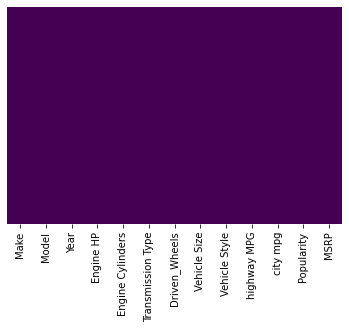

In [525]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [526]:
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


Hence all the irrelevant columns are now successfully dropped.

# STEP 3:

##Renaming the Labelled Columns

A Proper Representation of the Data is of key importance while performing an EDA Report for the viewers.

In [527]:
# Rename multiple columns in one go with a larger dictionary
data.rename(
    columns={
         "Engine HP": "HP", 
         "Engine Cylinders": "Cylinders",
         "Transmission Type": "Transmission", 
         "Driven_Wheels": "Drive Mode",
         "highway MPG": "MPG-H",
         "city mpg": "MPG-C", 
         "MSRP": "Price"

    },
    inplace=True
)

In [528]:
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [529]:
data.shape

(11914, 13)

# STEP 4:

## Cleaning The Data : Checking Duplicates, Null values and Missing data

Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set,
table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or
deleting the dirty or coarse data.


###**Checking Duplicate Values**

This is often an important check to perform because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [530]:
data.duplicated().sum()
data.duplicated(subset=None, keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [531]:
#data.duplicated(subset=None, keep='first')
data.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

In [532]:
data = data.drop_duplicates(subset=None, keep='first')
data.duplicated().sum()

0

In [533]:
data.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [534]:
data.shape

(11122, 13)

###**Eliminating The Null Values**

In [535]:
print(data.isnull().sum())
data.isnull()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False


In [536]:
data=data.dropna()
print(data.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [537]:
data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

Hence we can see that all the null values have been successfully removed!

**Therefore we can conclude now that the data is now completely cleaned for further Data Analysis.**

# STEP 5:

## Plotting Graphs and Outlier Analysis


In Statistics, **Outliers** are the extreme values that deviate from other observations on data indicating a variability in a measurement, experimental errors or a novelty. 

Such datapoints could could cause anomalies while performing Data Analysis and hence should be eliminated from the data. 

###**Plotting Outlier Graphs using Boxplot**

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also
have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the term box and whisker plot. Outliers may be plotted as individual points

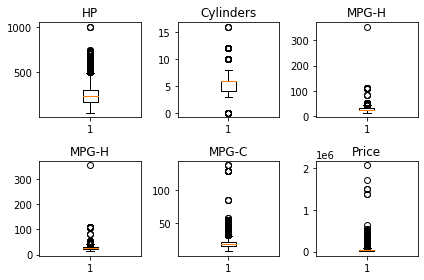

In [538]:
fig, ax= plt.subplots(2,3)

ax[0,0].boxplot(x=data['HP'])
ax[0,0].set_title("HP")

ax[0,1].boxplot(x=data['Cylinders'])
ax[0,1].set_title("Cylinders")

ax[0,2].boxplot(x=data['MPG-H'])
ax[0,2].set_title("MPG-H")

ax[1,0].boxplot(x=data['MPG-H'])
ax[1,0].set_title("MPG-H")

ax[1,1].boxplot(x=data['MPG-C'])
ax[1,1].set_title("MPG-C")

ax[1,2].boxplot(x=data['Price'])
ax[1,2].set_title("Price")


plt.tight_layout()

###**Plotting Outlier Graphs using Scatterplot**

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

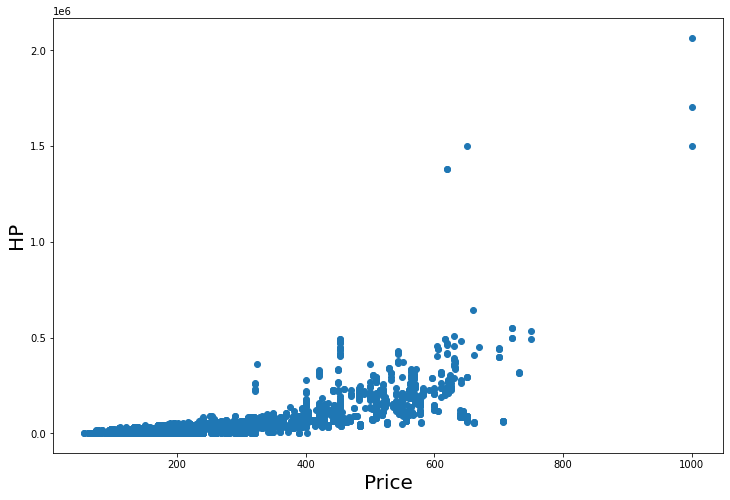

In [539]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('Price', fontsize=20)
ax.set_ylabel('HP', fontsize=20)
plt.show()

In [540]:
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


###**Removing the Outliers using Interquartile Range Function**

The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles.

In [541]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [542]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8546, 13)

Hence we conclude that we have eliminated all the outliers from the data.

# STEP 6:

### Plotting the Most Represented Car Brands and finding the average price among the top car brands

A Better Visualisation of the Data contributes to a better Decision Making in an Exploratory Data Analysis  :) 

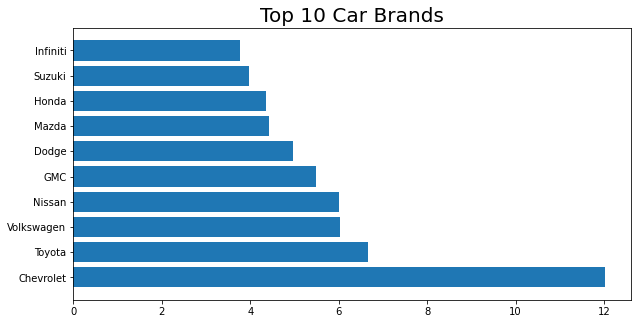

In [543]:
# Percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car Brands', fontsize = 20)
plt.show()

In [544]:
prices = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


Hence we can conclude by the plots that **Chevrolet** is the most represented Car Brand amongst all others. 

# STEP 7:

##Plotting the correlation matrix and Documenting the Insights

In [545]:
data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


###**Heat Maps and Correlation**

A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to
communicate a value to the reader.

A correlation matrix is a table showing correlation coefficients between variables.

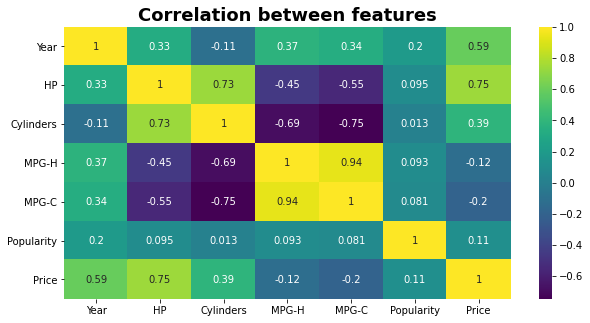

In [546]:
data_corr=data.corr()
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

###**Scatter Plots**

A Scatter Plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data values.

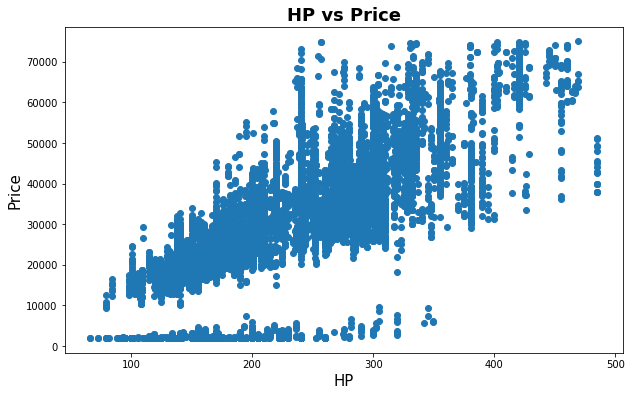

In [547]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
plt.title("HP vs Price",weight='bold',fontsize=18)
plt.show()

###**Documenting The Insights**

**Which are most correlational factors amongst all?**

*   Cylinders & HP
*   Highway MPG & City MPG



**Which are most Anti-correlational factors amongst all?**
*   Cylinders & Highway MPG




Hence all the values are successfully plotted in the correlation matrix and are statistically represented by the Scatterplot.

# STEP 8:

##Performing an Exploratory Data Analysis (EDA)

In [548]:
#creating new column function for 'Price Range' for easy visualization
def getrange(Price):
 if (Price >= 0 and Price < 25000):
      return '0 - 25000'
 if (Price >= 25000 and Price < 50000):
      return '25000 - 50000'
 if (Price >= 50000 and Price < 75000):
      return '50000 - 75000'
 if (Price >= 75000 and Price < 100000):
      return '75000 - 100000'

data['Price Range'] = data.apply(lambda x:getrange(x['Price']),axis = 1)
data['Price Range'].value_counts()

25000 - 50000     4648
0 - 25000         2993
50000 - 75000      904
75000 - 100000       1
Name: Price Range, dtype: int64

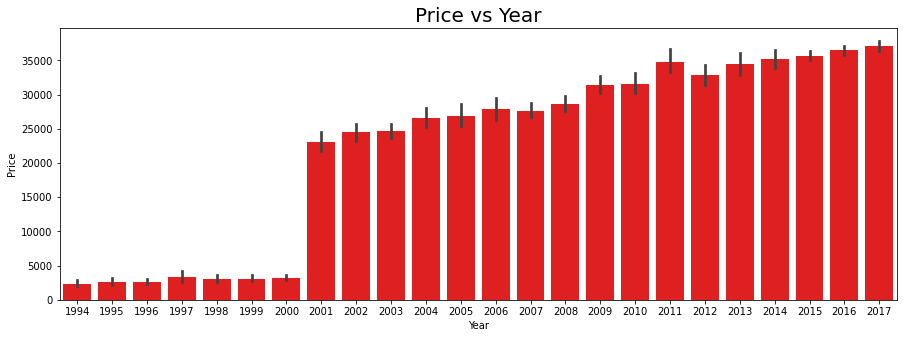

In [549]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title("Price vs Year",fontweight = 30,fontsize = 20)
sns.barplot(data['Year'],data['Price'],color='red')

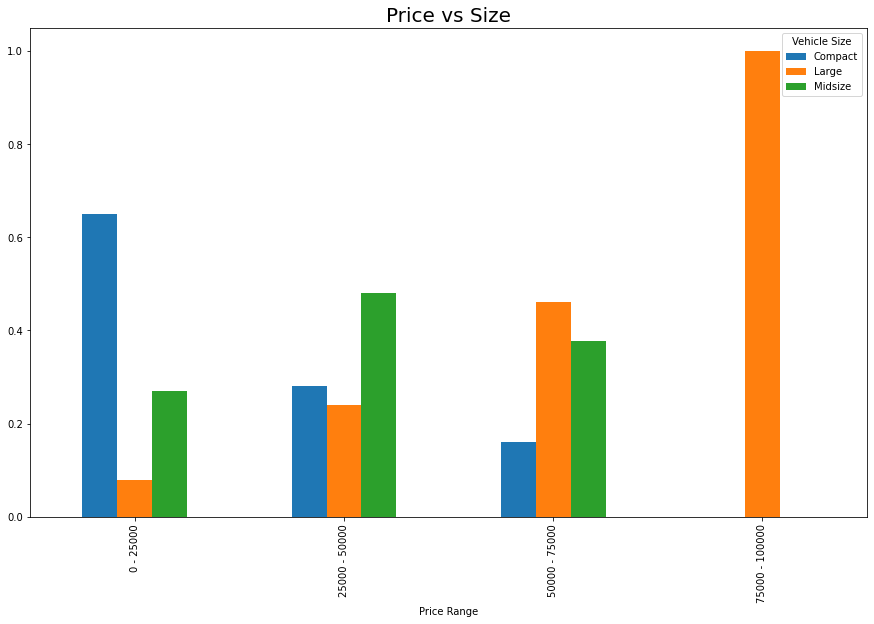

In [550]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['Price Range'],data['Vehicle Size'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Price vs Size',fontweight = 30,fontsize = 20)
plt.show()


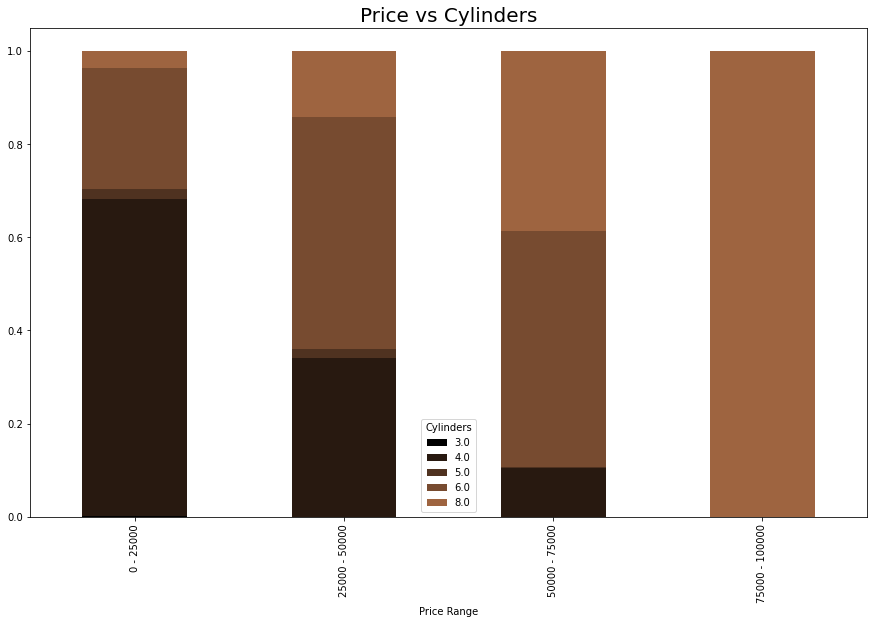

In [551]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['Price Range'],data['Cylinders'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Price vs Cylinders",fontweight = 30,fontsize = 20)
plt.show()

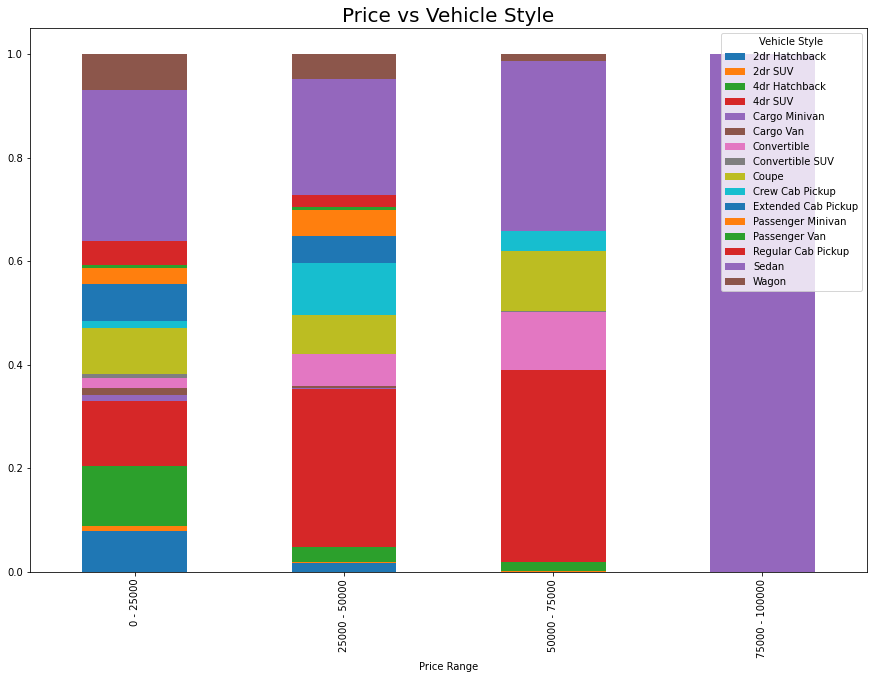

In [552]:
plt.rcParams['figure.figsize'] = (15,10)
x = pd.crosstab(data['Price Range'],data['Vehicle Style'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title("Price vs Vehicle Style",fontweight = 30,fontsize = 20)
plt.show()

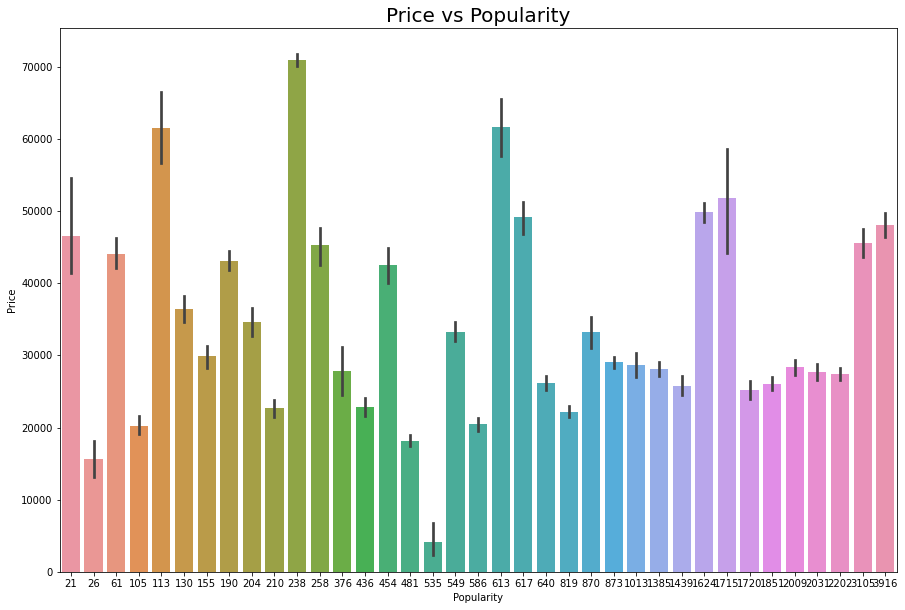

In [553]:
plt.title("Price vs Popularity",fontweight = 30,fontsize = 20)
sns.barplot(data['Popularity'],data['Price'])

##Documenting the Findings

1.   The Car Price is increased gradually after the year 2000.
2.   The Price is always maximum for MPG-H 13 and lowest for MPG-H 15.
3.   The Number of Cylinders are directly proportional to the Price.
4.   The Price is always maximum for MPG-C 10 and lowest for MPG-C 31.
5.   Automatic type of transmission is preferred transmission over all  price ranges and hence, is independent of price.





# STEP 9:

## Splitting The Dataset

It is standard in Machine Learning to split data into training and test sets. The reason for this is very straightforward: if you try and evaluate your system on data you have trained it on, you are doing something unrealistic. The whole point of a machine learning system is to be able to work with unseen data.

###**Label Encoding**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated.

In [554]:
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Range
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135,25000 - 50000
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650,25000 - 50000
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350,25000 - 50000
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450,25000 - 50000
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500,25000 - 50000


In [555]:
from sklearn.preprocessing import LabelEncoder
# creating an encoder
le = LabelEncoder()
# label encoding for Engine Fuel Tpe
#data['Engine Fuel Type'] = le.fit_transform(data['Engine Fuel Type'])
# label encoding for Transmission
data['Transmission'] = le.fit_transform(data['Transmission'])
# label encoding for Drive Mode
data['Drive Mode'] = le.fit_transform(data['Drive Mode'])
# label encoding for Vehicle Size
data['Vehicle Size'] = le.fit_transform(data['Vehicle Size'])
# label encoding for Vehicle Style
data['Vehicle Style'] = le.fit_transform(data['Vehicle Style'])
# label encoding for Make
data['Make'] = le.fit_transform(data['Make'])
# label encoding for Model
data['Model'] = le.fit_transform(data['Model'])
# label encoding for Price Range
data['Price'] = le.fit_transform(data['Price'])

In [556]:
data.tail()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Range
11909,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,3944,25000 - 50000
11910,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,4415,50000 - 75000
11911,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,4187,50000 - 75000
11912,0,636,2013,300.0,6.0,1,0,2,2,23,16,204,4201,50000 - 75000
11913,19,637,2006,221.0,6.0,1,2,2,14,26,17,61,2196,25000 - 50000


In [557]:
# splitting the dependent and independent variables
#x = data.iloc[:,:12]
#y = data.iloc[:,12]
#x=data.iloc[:,:-1] 
#y=data.iloc[:,-1] 
#y = data['Price'].values
#print(x.shape)
#print(y.shape)
#x.head()

In [558]:
# Splitting the dependent and independent variables
x = data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = data['Price'].values

###**Splitting the Dataset into Train and Test Labels**

In Machine Learning, we basically try to create a model to predict the test data. So, we use the training data to fit the model and testing data to test the model. The test set is generally what is used to evaluate the models.

In [559]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [560]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6836, 6)
(6836, 1)
(1710, 6)
(1710, 1)


# STEP 10:

## Implementing Various Machine Learning Algorithms

The types of machine learning algorithms differ in their approach, the type of data they input and output, and the type of task or problem that they are intended to solve.

In [561]:
#IMPLEMENTING STANDARD SCALER Normalization
#from sklearn.preprocessing import MinMaxScaler
# creating a scaler
#mm = MinMaxScaler()
# feeding the independent variable into the scaler
#x_train = mm.fit_transform(x_train)
#x_test = mm.transform(x_test)

In [562]:
#IMPLEMENTING STANDARD SCALER Normalization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)

#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

###**Linear Regression**

In statistics, Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called **Simple Linear Regression**. It attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [563]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

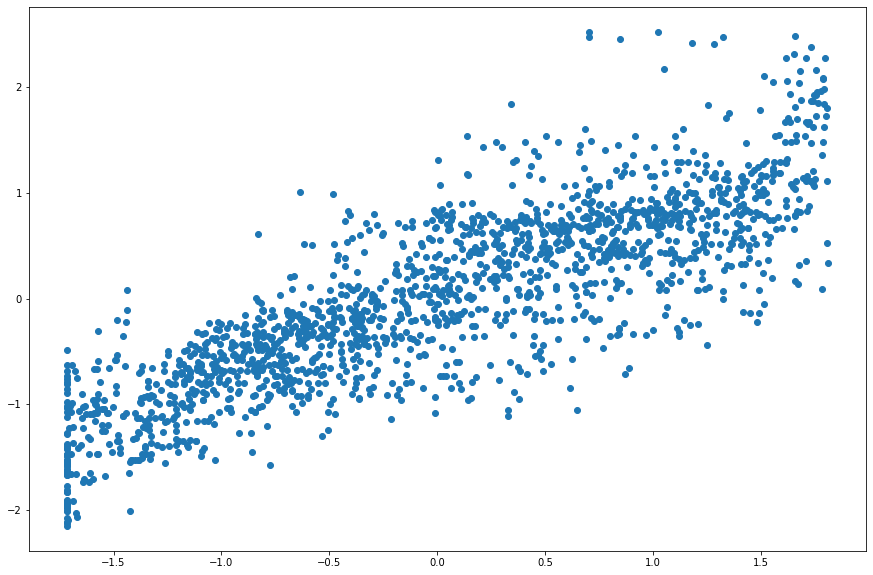

In [564]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

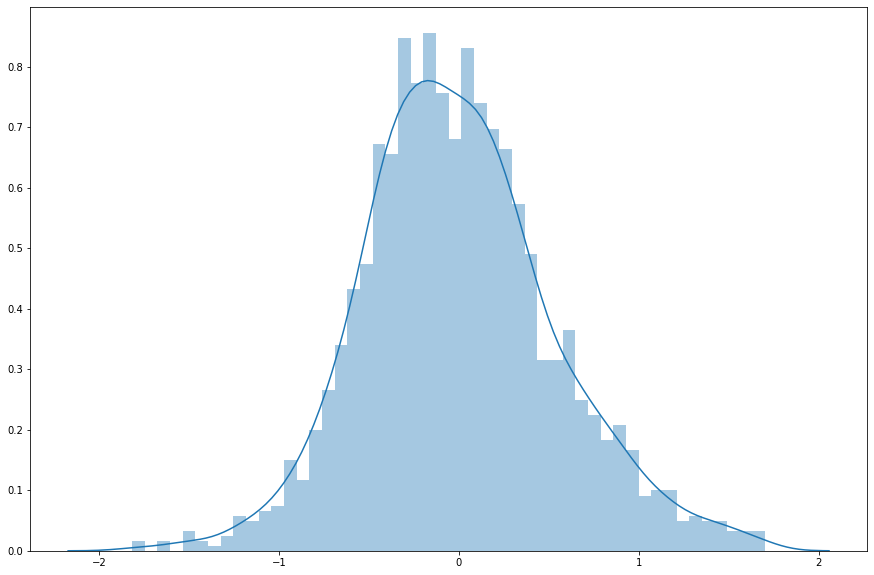

In [565]:
sns.distplot((y_test-y_pred),bins=50)

In [567]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4176259735877096
Root Mean Squared Error: 0.5341308273109304
R2 Score: 0.7075895169982236


###**Polynomial Linear Regression**

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

In [568]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

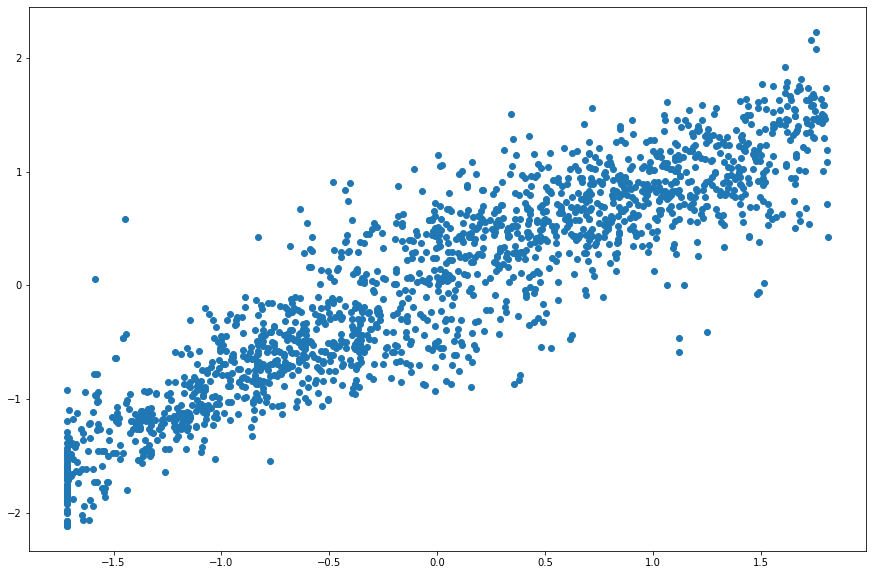

In [569]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test,y_pred)

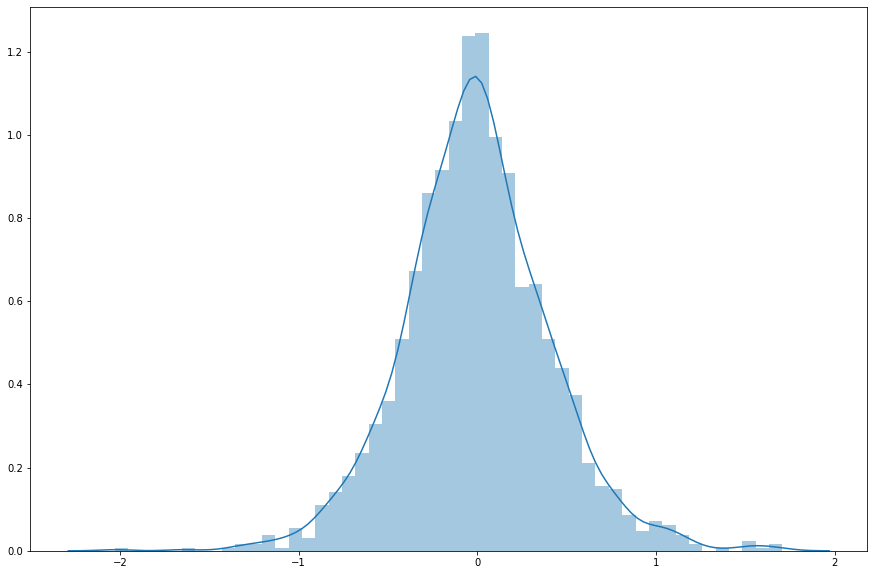

In [570]:
sns.distplot((y_test-y_pred),bins=50)

In [571]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3094835337096744
Root Mean Squared Error: 0.40924064067283955
R2 Score: 0.8283455123016693


###**SVM**

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.

In [572]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [573]:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

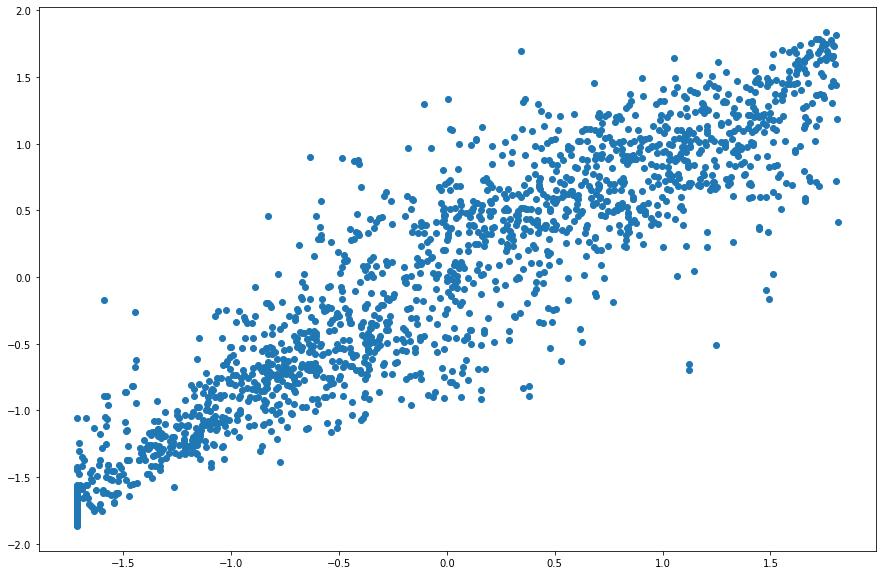

In [574]:
# Predicting a new result
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

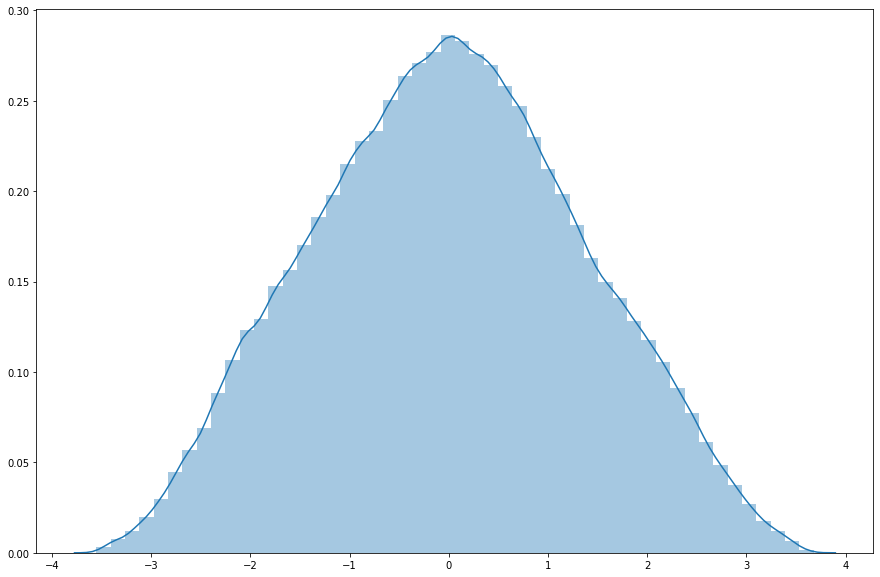

In [575]:
sns.distplot((y_test-y_pred),bins=50)

In [576]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2956929873413738
Root Mean Squared Error: 0.4027913464024967
R2 Score: 0.8337131473599289


###**Random Forests**

Random forests or random decision forests are an ensemble learning method for regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [577]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

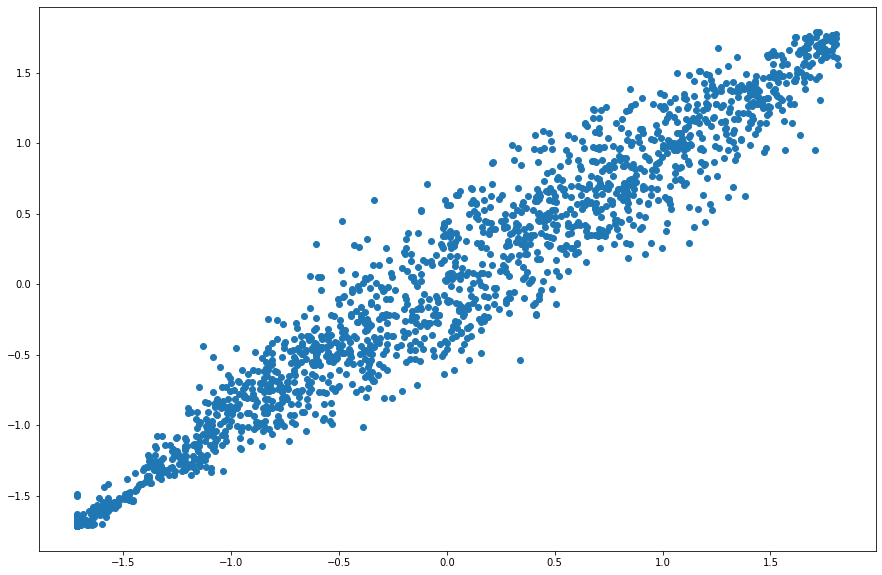

In [578]:
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

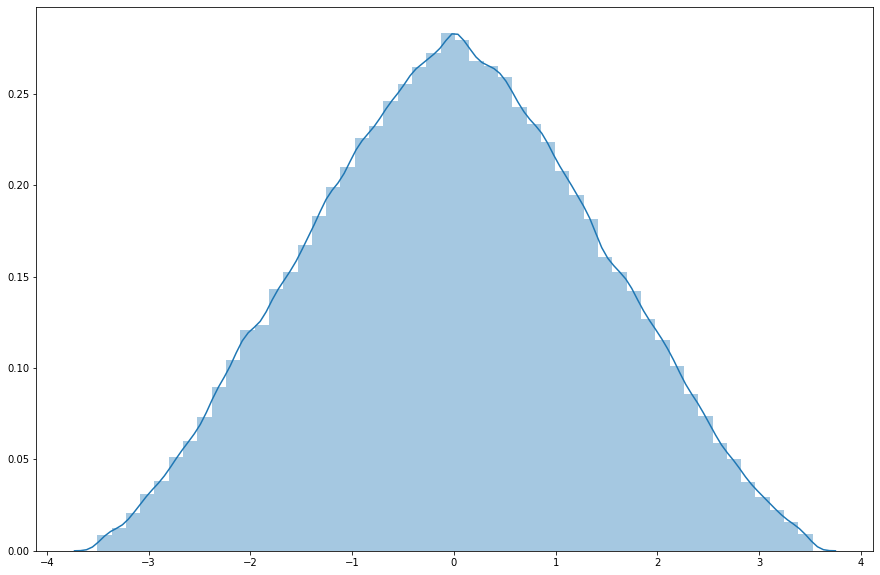

In [579]:
sns.distplot((y_test-y_pred),bins=50)

In [580]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1861213813159454
Root Mean Squared Error: 0.24845897162945524
R2 Score: 0.9367286622420182


Hence, we conclude that **Random Forests** has proven to be the best fit for the Test data with the Maximum R2 Score minimizing all the Errors.

# Conclusion

We have succesfully Completed our EDA Report and Implemented various Machine Learning Models.

## My Thoughts

It was a splendid journey developing this project and I would always be keen to find myself working out for many more opportunities in the Forthcoming Future.

Thank You !